In [95]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
dataset=tf.keras.utils.image_dataset_from_directory("Leaf_photos",batch_size=32)

Found 117 files belonging to 3 classes.


In [100]:
dataset.class_names

['EarlyBlight', 'Healthy', 'LateBlight']

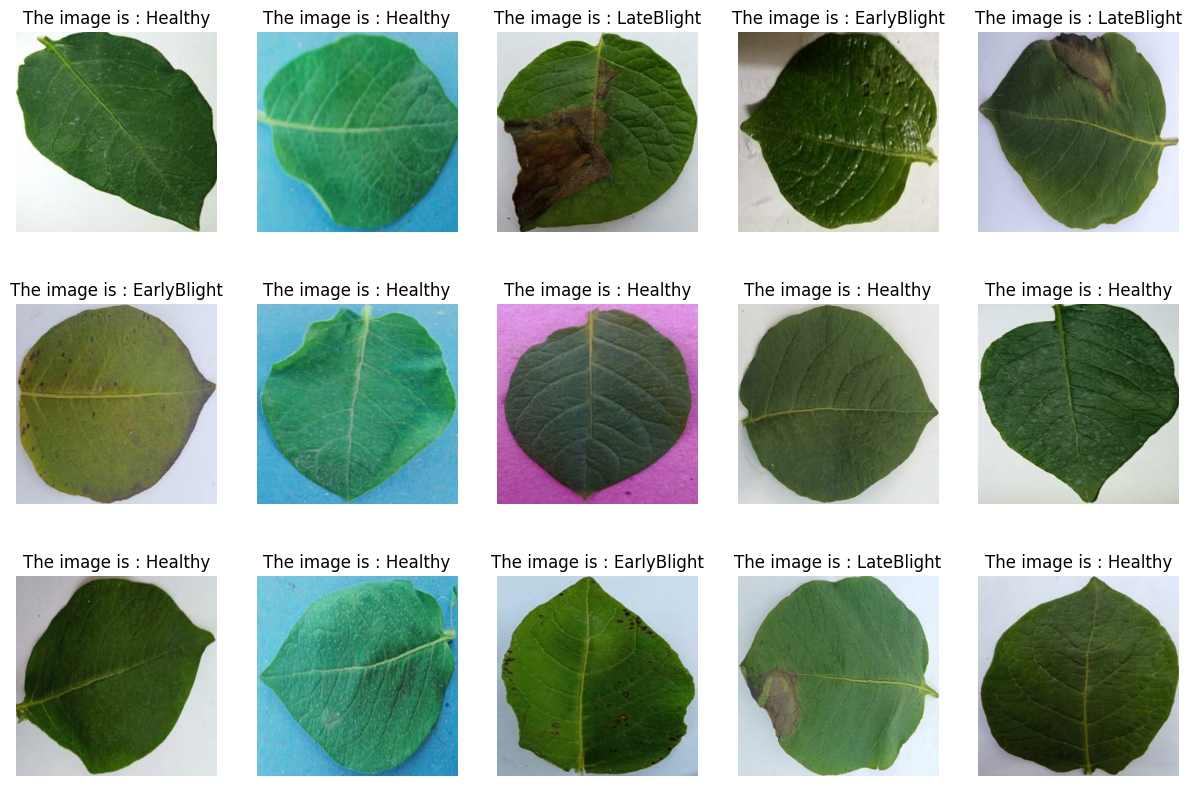

In [101]:
plt.figure(figsize=(15,10))
for image,label in dataset.take(3):
    for i in range(15):
        plt.subplot(3,5,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(f"The image is : {dataset.class_names[label[i]]}")
        plt.axis("off")

In [102]:
def get_dataset_split(dataset,train_ds_split=0.8,validation_Ds_split=0.2,shuffle=True,buffer_size=100):
    dataset_len=len(dataset)
    if shuffle:
        dataset=dataset.shuffle(buffer_size)
    train_ds=dataset.take(round(dataset_len*train_ds_split))
    test_ds=dataset.take(round(dataset_len*train_ds_split))
    val_ds=dataset.skip(round(dataset_len*train_ds_split))
    return train_ds,test_ds,val_ds
    

In [103]:
train_ds,test_ds,val_ds=get_dataset_split(dataset)

In [45]:
train_ds,test_ds,val_ds

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [46]:
train_ds=train_ds.cache().shuffle(10).prefetch(10)
test_ds=test_ds.cache().shuffle(10).prefetch(10)
val_ds=val_ds.cache().shuffle(10).prefetch(10)

In [55]:
model=keras.models.Sequential([
    # Resizing and rescaling
    keras.layers.Resizing(256,256),
    keras.layers.Rescaling(1//255.0),

    # data Augmentation
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomFlip("horizontal and vertical"),

    #CNN Layer
    keras.layers.Conv2D(filters=10,kernel_size=(2,2),activation="relu",input_shape=(256,256,3)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=10,kernel_size=(2,2),activation="relu",input_shape=(256,256,3)),
    keras.layers.MaxPooling2D((2,2)),


    keras.layers.Flatten(),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(3,activation="softmax")

])

In [121]:
model.compile(optimizer="adam",loss=keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [122]:
history=model.fit(train_ds,epochs=100,validation_data=val_ds)

Epoch 1/100


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 671ms/step - accuracy: 0.3615 - loss: 1.0969 - val_accuracy: 0.2188 - val_loss: 1.1098
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 397ms/step - accuracy: 0.2999 - loss: 1.1032 - val_accuracy: 0.3438 - val_loss: 1.0988
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 451ms/step - accuracy: 0.3366 - loss: 1.0994 - val_accuracy: 0.3438 - val_loss: 1.0977
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 579ms/step - accuracy: 0.3188 - loss: 1.1009 - val_accuracy: 0.2188 - val_loss: 1.1109
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step - accuracy: 0.2943 - loss: 1.1028 - val_accuracy: 0.3333 - val_loss: 1.1004
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step - accuracy: 0.3230 - loss: 1.1009 - val_accuracy: 0.3810 - val_loss: 1.0956
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 421ms/step - accuracy: 0.3763 - loss: 1.0956 - val_accuracy: 0.2812 - val_loss: 1.1037
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step - accuracy: 0.3206 - loss: 1.1005 - val_accuracy: 0.2500 - val_loss: 1.1

In [123]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [124]:
for image,lebel in test_ds:
    for i in range(1):
        image=image[i]
        resized_image=np.expand_dims(image,0)
        print([np.argmax(i) for i in model.predict(resized_image)][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2


In [129]:
model.save("CNN_model.h5")

In [131]:
model=tf.keras.models.load_model("CNN_model.h5")

In [132]:
for image,lebel in test_ds:
    for i in range(1):
        image=image[i]
        resized_image=np.expand_dims(image,0)
        print([np.argmax(i) for i in model.predict(resized_image)][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
2
